# Linear regression with multiple variables

Week2の多変量の線形回帰の課題について

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sns.set_style('whitegrid')

import sys, os
sys.path.append(os.path.dirname('../common/'))
from common import *

## Training data

In [2]:
train_frame = pd.read_csv("ex1data2.txt", names=('size', 'bedrooms', 'price'))
train_frame.head(5)

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
m = len(train_frame['size'])
X = np.c_[np.ones((m, 1)), 
          np.array(train_frame['size']).reshape(-1, 1), 
          np.array(train_frame['bedrooms']).reshape(-1, 1)]
y = np.array(train_frame['price']).reshape(-1, 1)

saved assets/week02_linreg_multi_train.png


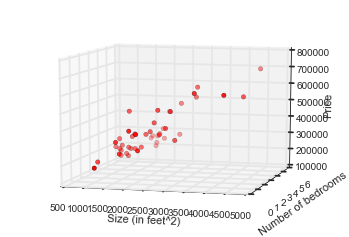

In [4]:
def plot_data():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(X[:,1], X[:,2], y, c='red')
    ax.set_xlabel('Size (in feet^2)')
    ax.set_ylabel('Number of bedrooms')
    ax.set_zlabel('Price')
    ax.view_init(elev=10., azim=-75)
    return ax
    
plot_data()
savefig('week02_linreg_multi_train.png')

## Gradient Descent

In [5]:
%run linreg.py

In [6]:
n = X.shape[1]
initial_theta = np.zeros((n, 1))

iterations = 400
alpha = 1e-8
theta, J_history = gradient_descent(initial_theta, X, y, alpha, iterations)

theta

array([[  1.09739788e-01],
       [  1.65382735e+02],
       [  3.05252688e-01]])

saved assets/week02_linreg_multi_cost_history.png


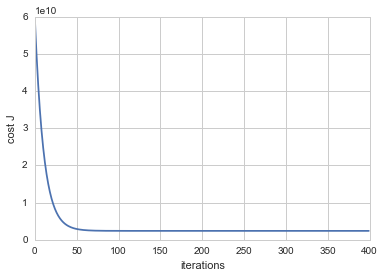

In [7]:
fig = plt.figure()
plt.xlim(0, iterations)
ax = fig.add_subplot(1,1,1)
ax.plot(J_history)
ax.set_xlabel('iterations')
ax.set_ylabel('cost J')
savefig('week02_linreg_multi_cost_history.png')

## Prediction

In [8]:
gridsize = 4
xs0, xs1 = np.meshgrid(np.linspace(500, 5000, gridsize),
                       np.linspace(0, 6, gridsize))

ypreds = np.zeros((gridsize, gridsize))
for i in range(gridsize):
    for j in range(gridsize):
        xs = np.array([1.0, xs0[i, j], xs1[i, j]])
        ypreds[i, j] = predict(theta, xs)

saved assets/week02_linreg_multi_pred.png


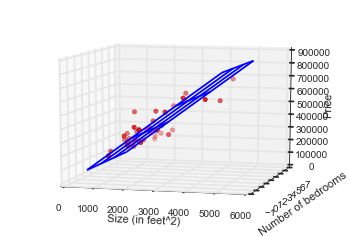

In [9]:
ax = plot_data()
ax.plot_wireframe(xs0, xs1, ypreds)
savefig('week02_linreg_multi_pred.png')

## Normal Equations

In [10]:
# theta = (X^T * X)^-1 * X^T * y
theta2 = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

theta, theta2

(array([[  1.09739788e-01],
        [  1.65382735e+02],
        [  3.05252688e-01]]), array([[ 89597.90954355],
        [   139.21067402],
        [ -8738.01911255]]))

In [11]:
gridsize = 4
xs0, xs1 = np.meshgrid(np.linspace(500, 5000, gridsize),
                       np.linspace(0, 6, gridsize))

ypreds = np.zeros((gridsize, gridsize))
for i in range(gridsize):
    for j in range(gridsize):
        xs = np.array([1.0, xs0[i, j], xs1[i, j]])
        ypreds[i, j] = predict(theta, xs)

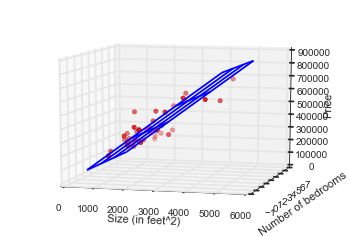

In [12]:
ax = plot_data()
ax.plot_wireframe(xs0, xs1, ypreds)